# Quantum Circuit Simulation for n Qubits  
### Author: Angel Fernandez

---

**Date:** [Date of creation or submission, e.g., November 09, 2024]  
**Environment:** Python 3, Google Colab TPU v2-8  
**RAM Limit:** 334.6 GB  

---


In this project, a quantum circuit was implemented for n qubits using vectors and matrices with Kronecker products in Google Colab. The gates used were the Hadamard (H), NOT (X), and CNOT gates.

#Initialization

In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define gate matrices
I = np.array([[1, 0], [0, 1]])  # Identity matrix
X = np.array([[0, 1], [1, 0]])  # NOT gate matrix
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2) #Hadamard gate matrix

# Functions

In [3]:
# Function to apply 'H' and 'X' gates for the entire system by Kronecker product.
def full_gate_matrix(gate, n, target_qubit):
    """
    Build the full_gate matrix for n qubits for H and X gates.
    gate: H or X gate.
    n: number of qubits.
    target_qubit: index of the qubit to apply the gate.
    """
    full_gate = 1
    for i in range(n):
        # The Kronecker product is applied to the corresponding gate for qubit n
        if i == target_qubit:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    return full_gate

# Function to apply the 'CNOT' gate to a system of n qubits
def cnot_matrix(n, control, target):
    """
    Construye la matriz de CNOT para n qubits
    n: número total de qubits
    control: lista de índices de los qubits de control (0 a n-1)
    target: índice del qubit de destino (0 a n-1)
    """
    dim = 2 ** n
    cnot = np.identity(dim, dtype=int)

    for i in range(dim):
        bits = list(format(i, f'0{n}b'))  #Get the binary representation of i
        # Verify if all control bits are 1
        if all(bits[c] == '1' for c in control):
            bits[target] = '0' if bits[target] == '1' else '1'
            # Change the target bit
            j = int("".join(bits), 2)
            # Swap rows
            cnot[i, i], cnot[i, j] = 0, 1
            cnot[j, j], cnot[j, i] = 0, 1
    return cnot

def run_circuit(statev, n, gate_sequence):
    # Apply each gate in sequence
    for gate, target_qubit in gate_sequence:
        if gate == 'X':
            full_gate = full_gate_matrix(X, n, target_qubit)
            statev = np.dot(full_gate, statev)
        elif gate == 'H':
            full_gate = full_gate_matrix(H, n, target_qubit)
            statev = np.dot(full_gate, statev)
        elif gate == 'CNOT':
            control, target = target_qubit
            full_gate = cnot_matrix(n, control, target)
            statev = np.dot(full_gate, statev)
    return statev

# Test with 3 qubits

In [4]:
n = 3 # Number of qbits

# Initialize the state vector to |0...0>
statev = np.zeros(2**n)
statev[0] = 1  # Set |0...0> state
print("Initial state vector:", statev)

# Circuit working example
# ('H',target_qubit), ('X',target_qubit), ('CNOT', (control_qubit, target_qubit))]
gate_sequence = [('H', 2), ('X', 1), ('CNOT', ([0,1], 2)), ('X', 1)]
statev_final = run_circuit(statev, n, gate_sequence)

print("Final state vector:", statev_final)

Initial state vector: [1. 0. 0. 0. 0. 0. 0. 0.]
Final state vector: [0.70710678 0.70710678 0.         0.         0.         0.
 0.         0.        ]


# Run cirtuit

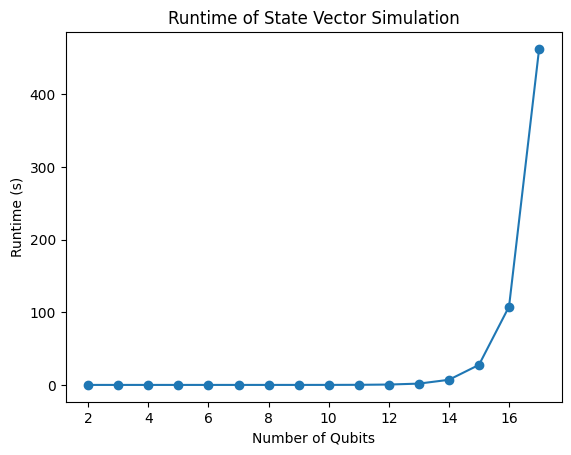

In [5]:
# Plot runtime as function of number of qubits
qubits_range = range(2, 18)
times = []

for n in qubits_range:
    # Initialize the state vector to |0...0>
    statev = np.zeros(2**n)
    statev[0] = 1  # Set |0...0> state
    gate_sequence = [('H', 0), ('X', n-1), ('CNOT', ([n-1], 0))]  # Example circuit
    start_time = time.time()
    final_state = run_circuit(statev, n, gate_sequence)
    end_time = time.time()
    times.append(end_time - start_time)

plt.plot(qubits_range, times, marker='o')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.title('Runtime of State Vector Simulation')
plt.show()

In [21]:
print(f"For a {n}-qubit system, the sample circuit took {round(times[-1],2)} seconds to process.")

For a 17-qubit system, the sample circuit took 462.49 seconds to process.


# Conclusions
For the final execution, which involved 17 qubits, memory usage reached 285.6 GB of RAM. Given these conditions, it was determined that **the maximum number of qubits** feasible in this particular environment **is 17**, due to the RAM limit of 334.6 GB.

In terms of processing time, executing the circuit for 17 qubits required 462.49 seconds. While it may be possible to increase the number of qubits without significantly impacting time, the memory requirements will remain the primary constraint in this environment.